## 正则化线性回归

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy.io import loadmat
import scipy.optimize as opt

In [2]:
# load data
X=loadmat('ex5data1.mat')['X'] 
y=loadmat('ex5data1.mat')['y'].ravel() #展开成一维，下同
Xval = loadmat('ex5data1.mat')['Xval']
yval = loadmat('ex5data1.mat')['yval'].ravel()
Xtest = loadmat('ex5data1.mat')['Xtest']
ytest = loadmat('ex5data1.mat')['ytest'].ravel()

[Text(0.5, 0, 'X'), Text(0, 0.5, 'y')]

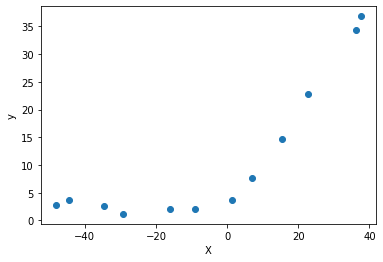

In [3]:
#可视化
fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set(xlabel='X',ylabel='y')

In [4]:
def insertOnes(x):
    return np.insert(x,0,np.ones(x.shape[0]),axis=1) # 给X插入1

In [5]:
X=insertOnes(X)
X

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [6]:
theta = np.zeros(X.shape[1])
theta

array([0., 0.])

In [7]:
#正则化损失函数
def cost(theta,X,y):
    m = X.shape[0] # 样本数目
    error = np.sum(np.square(X.dot(theta.T) - y))
    return error / (2*m)

In [8]:
def r_cost(theta,X,y,l=1):
    m = X.shape[0]
    r = (np.sum(np.square(theta[1:]))) * (l/(2*m))
    return cost(theta,X,y) + r

In [25]:
theta = np.ones(X.shape[1]) # 将theta 的初始值变为1
r_cost(theta,X,y)

303.9931922202643

In [18]:
theta

array([1., 1.])

## 梯度下降 regularized linear regression gradient 

In [24]:
def gradient(theta,X,y,l=1):
    m = X.shape[0] # 样本个数
    temptheta = theta.copy()
    temptheta[0] = 0 # 将bias的系数变为0，这样后面算梯度就影响不到bias项了
    r = temptheta * (l/m) # 正则化项
    error = X.dot(theta.T) -y 
    gradTheta = X.T.dot(error) / m  + r 
    return gradTheta  

In [26]:
gradient(theta,X,y)

array([-15.30301567, 598.25074417])

## 拟合线性回归


In [28]:
def linear_regression_np(X, y, l=1):
    """linear regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.ones(X.shape[1])

    # train it
    res = opt.minimize(fun=r_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=gradient,
                       options={'disp': True})
    return res


In [33]:
linear_regression_np(X,y)

     fun: 22.379541822940265
     jac: array([1.25341733e-08, 8.56473651e-08])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 7
     nit: 3
  status: 0
 success: True
       x: array([13.08771417,  0.367742  ])

In [35]:
theta = linear_regression_np(X,y,l=0).x
theta

array([13.08790348,  0.36777923])

[Text(0.5, 0, 'X'), Text(0, 0.5, 'y')]

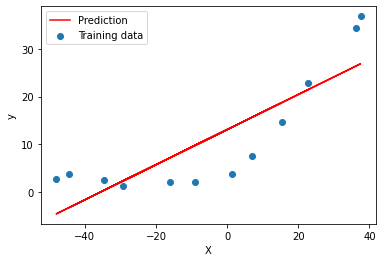

In [43]:
#可视化
fig,ax = plt.subplots()
ax.scatter(X[:,1:],y,label='Training data') #X 加上了1，改变了维度
ax.plot(X[:,1:],X.dot(theta.T),color='r',label="Prediction") # X.dot(theta.T) 很优雅
ax.legend()
ax.set(xlabel='X',ylabel='y')

## bias-variance

# learning curve #学习曲线

In [195]:
def get_Jcost(Xtrain,ytrain,Xval,yval):
    #theta = np.ones(Xtrain.shape[1]) #init theta
    Jtrain = [] # 训练集的error
    Jval = [] #验证集的error
    for i in range(1,Xtrain.shape[0] + 1):
        theta = linear_regression_np(Xtrain[:i],ytrain[:i],l=0).x #每增加一个数据集就重新拟合theta
        Jtrain.append(cost(theta,Xval[:i],yval[:i])) # 计算error
        Jval.append(cost(theta,Xval,yval)) #用训练集拟合的theta去计算测试集的error
    return Jtrain,Jval

In [84]:
Jtrain,Jval = get_Jcost(X,y,Xval,yval)

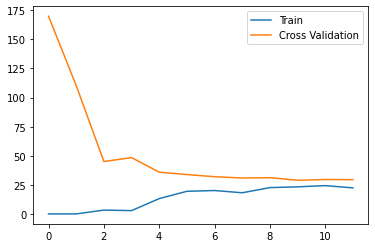

In [87]:
fig,ax=plt.subplots()
ax.plot(range(len(Jtrain)),Jtrain,label='Train')
ax.plot(range(len(Jval)),Jval,label='Cross Validation')
ax.legend()

# Polynomial regression

In [152]:
def poly_features(x,n):
    tmp =[np.ones(x.shape[0])]
    for i in range(1,n+1):
        tmp.append(np.power(X[:,1],i))
    return pd.DataFrame(tmp).values.T

In [153]:
tmp=poly_features(X,8)
pd.DataFrame(tmp)

,0,1,2,3,4,5,6,7,8
0,1.0,-15.936758,253.980260,-4047.621971,6.450597e+04,-1.028016e+06,1.638324e+07,-2.610958e+08,4.161020e+09
1,1.0,-29.152979,849.896197,-24777.006175,7.223235e+05,-2.105788e+07,6.139000e+08,-1.789701e+10,5.217513e+11
2,1.0,36.189549,1309.683430,47396.852168,1.715271e+06,6.207487e+07,2.246462e+09,8.129843e+10,2.942154e+12
3,1.0,37.492187,1405.664111,52701.422173,1.975892e+06,7.408050e+07,2.777440e+09,1.041323e+11,3.904148e+12
4,1.0,-48.058829,2309.651088,-110999.127750,5.334488e+06,-2.563693e+08,1.232081e+10,-5.921235e+11,2.845676e+13
5,1.0,-8.941458,79.949670,-714.866612,6.391950e+03,-5.715335e+04,5.110343e+05,-4.569391e+06,4.085702e+07
6,1.0,15.307793,234.328523,3587.052500,5.490986e+04,8.405487e+05,1.286695e+07,1.969645e+08,3.015092e+09
7,1.0,-34.706266,1204.524887,-41804.560890,1.450880e+06,-5.035463e+07,1.747621e+09,-6.065341e+10,2.105053e+12
8,1.0,1.389154,1.929750,2.680720,3.723935e+00,5.173120e+00,7.186262e+00,9.982827e+00,1.386769e+01
9,1.0,-44.383760,1969.918139,-87432.373590,3.880577e+06,-1.722346e+08,7.644420e+09,-3.392881e+11,1.505888e+13


In [173]:
X_poly = poly_features(X,8)

# normalization  标准化

In [172]:
#def normalize_feature(df):
#    """Applies function along input axis(default 0) of DataFrame."""
#    return df.apply(lambda column: (column - column.mean()) / column.std())

In [174]:
#normalize_feature(pd.DataFrame(X_poly))

,0,1,2,3,4,5,6,7,8
0,NaN,-0.362141,-0.755087,0.182226,-0.706190,0.306618,-0.590878,0.344516,-0.508481
1,NaN,-0.803205,0.001258,-0.247937,-0.327023,0.093396,-0.435818,0.255416,-0.448912
2,NaN,1.377467,0.584827,1.249769,0.245312,0.978360,-0.012156,0.756568,-0.170352
3,NaN,1.420940,0.706647,1.359846,0.395534,1.106162,0.125637,0.871929,-0.059638
4,NaN,-1.434149,1.854000,-2.037163,2.331431,-2.411536,2.602212,-2.645675,2.766085
5,NaN,-0.128687,-0.975969,0.251385,-0.739687,0.316953,-0.594997,0.345812,-0.508955
6,NaN,0.680582,-0.780029,0.340656,-0.711721,0.326509,-0.591790,0.346830,-0.508613
7,NaN,-0.988534,0.451358,-0.601282,0.092917,-0.218473,-0.141608,0.039403,-0.266693
8,NaN,0.216076,-1.074993,0.266275,-0.743369,0.317561,-0.595129,0.345835,-0.508960
9,NaN,-1.311501,1.422806,-1.548121,1.493396,-1.515908,1.388655,-1.368307,1.224144


In [171]:
from sklearn.preprocessing import StandardScaler

In [180]:
def normalize_feature(x):
    scaler = StandardScaler() #实例化
    scaler.fit(x)
    #scaler.mean_
    tmp = scaler.transform(x)
    tmp[:,0] = 1
    return tmp 
    

In [183]:
X_poly_scaled = normalize_feature(X_poly)
Xval_ploy = poly_features(Xval,8)
Xval_poly_scaled = normalize_feature(Xval_ploy)
pd.DataFrame(X_poly_scaled)

,0,1,2,3,4,5,6,7,8
0,1.0,-0.378244,-0.788662,0.190329,-0.737591,0.320252,-0.617152,0.359835,-0.531091
1,1.0,-0.838920,0.001314,-0.258962,-0.341565,0.097549,-0.455197,0.266773,-0.468874
2,1.0,1.438717,0.610832,1.305341,0.256220,1.021863,-0.012696,0.790210,-0.177927
3,1.0,1.484123,0.738068,1.420312,0.413122,1.155348,0.131224,0.910700,-0.062290
4,1.0,-1.497919,1.936440,-2.127747,2.435101,-2.518767,2.717922,-2.763317,2.889082
5,1.0,-0.134409,-1.019366,0.262563,-0.772578,0.331047,-0.621454,0.361189,-0.531587
6,1.0,0.710844,-0.814714,0.355803,-0.743368,0.341028,-0.618105,0.362252,-0.531229
7,1.0,-1.032490,0.471428,-0.628018,0.097049,-0.228188,-0.147905,0.041156,-0.278551
8,1.0,0.225684,-1.122793,0.278115,-0.776424,0.331682,-0.621592,0.361213,-0.531591
9,1.0,-1.369818,1.486072,-1.616960,1.559802,-1.583314,1.450403,-1.429150,1.278576


In [196]:
get_Jcost(X_poly_scaled,y,Xval_poly_scaled,yval)

([2.0724271042041673,
  3.1300314223588392,
  3.1167547431183955,
  88.23625168264705,
  154.8460018845222,
  129.71248681901588,
  118.69698528908673,
  128.48393782986588,
  114.72567347807768,
  117.80298456456337,
  107.62380995701056,
  98.3656895515198],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [197]:
def plot_learning_curve(X, y, Xval, yval, l=0):
    training_cost, cv_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression_np(X[:i, :], y[:i], l=l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = cost(res.x, X[:i, :], y[:i])
        cv = cost(res.x, Xval, yval)

        training_cost.append(tc)
        cv_cost.append(cv)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), cv_cost, label='cv cost')
    plt.legend(loc=1)


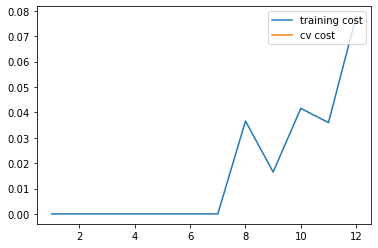

In [198]:
plot_learning_curve(X_poly_scaled,y,Xval_poly_scaled,yval)